In [106]:
from nltk import word_tokenize
import nltk
import os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
os.chdir('C:/Users/user/Desktop/BTS/Master/1st_Semester/Data Science Foundations/DataScienceFoundations/Session_5/individual_assignment')

In [108]:
with open('Led_Zeppelin_Since.txt') as file:
    Led_Zeppelin_Since = file.read().replace('\n', ' ')

with open('David_Bowie_Space_Oddity.txt') as file:
    David_Bowie_Space_Oddity = file.read().replace('\n', ' ')
    
with open('Led_Zeppelin_Stairway_to_Heaven.txt') as file:
    Led_Zeppelin_Stairway_to_Heaven = file.read().replace('\n', ' ')
    
with open('Nina_Simone_Free.txt') as file:
    Nina_Simone_Free = file.read().replace('\n', ' ')
    
with open('Pink_Floyd_Brain_Demage.txt') as file:
    Pink_Floyd_Brain_Demage = file.read().replace('\n', ' ')
    
with open('Pink_Floyd_Eclipse.txt') as file:
    Pink_Floyd_Eclipse = file.read().replace('\n', ' ')
    
with open('Pink_Floyd_Shine_on.txt') as file:
    Pink_Floyd_Shine_on = file.read().replace('\n', ' ')
    
with open('Pink_Floyd_Wish_You.txt') as file:
    Pink_Floyd_Wish_You = file.read().replace('\n', ' ')
    
with open('Pixies_Where_Is_My_Mind.txt') as file:
    Pixies_Where_Is_My_Mind = file.read().replace('\n', ' ')
    
with open('Queen_Bohemia_Rapsody.txt') as file:
    Queen_Bohemia_Rapsody = file.read().replace('\n', ' ')

In [109]:
lyrics = [Led_Zeppelin_Since, David_Bowie_Space_Oddity, Led_Zeppelin_Stairway_to_Heaven, Nina_Simone_Free, Pink_Floyd_Brain_Demage, Pink_Floyd_Eclipse, Pink_Floyd_Shine_on, Pink_Floyd_Wish_You, Pixies_Where_Is_My_Mind, Queen_Bohemia_Rapsody]
names = ['Led_Zeppelin_Since', 'David_Bowie_Space_Oddity', 'Led_Zeppelin_Stairway_to_Heaven', 'Nina_Simone_Free', 'Pink_Floyd_Brain_Demage', 'Pink_Floyd_Eclipse', 'Pink_Floyd_Shine_on', 'Pink_Floyd_Wish_You', 'Pixies_Where_Is_My_Mind', 'Queen_Bohemia_Rapsody']

In [110]:
tokenize = lambda doc: doc.lower().split(" ")

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=tokenize)

sklearn_representation = sklearn_tfidf.fit_transform(lyrics)

In [111]:
def cosine_similarity(vector1, vector2):
    dot_product = sum(p*q for p,q in zip(vector1, vector2))
    magnitude = math.sqrt(sum([val**2 for val in vector1])) * math.sqrt(sum([val**2 for val in vector2]))
    if not magnitude:
        return 0
    return dot_product/magnitude

In [112]:
similarity_mat = [[0 for x in range(10)] for x in range(10)]
for i in range(10):
    for j in range(10):
        similarity_mat[i][j] = (cosine_similarity(sklearn_representation.toarray()[i], sklearn_representation.toarray()[j]))
similarity_mat = np.around(similarity_mat, decimals=2)        

for row in similarity_mat:
    for elem in row:
        print(elem, end=' ')
    print()

1.0 0.09 0.13 0.15 0.08 0.1 0.04 0.1 0.11 0.22 
0.09 1.0 0.15 0.12 0.12 0.07 0.07 0.12 0.13 0.14 
0.13 0.15 1.0 0.16 0.15 0.16 0.11 0.12 0.13 0.18 
0.15 0.12 0.16 1.0 0.08 0.22 0.06 0.11 0.08 0.13 
0.08 0.12 0.15 0.08 1.0 0.15 0.09 0.05 0.13 0.12 
0.1 0.07 0.16 0.22 0.15 1.0 0.1 0.05 0.07 0.13 
0.04 0.07 0.11 0.06 0.09 0.1 1.0 0.1 0.07 0.07 
0.1 0.12 0.12 0.11 0.05 0.05 0.1 1.0 0.08 0.12 
0.11 0.13 0.13 0.08 0.13 0.07 0.07 0.08 1.0 0.12 
0.22 0.14 0.18 0.13 0.12 0.13 0.07 0.12 0.12 1.0 


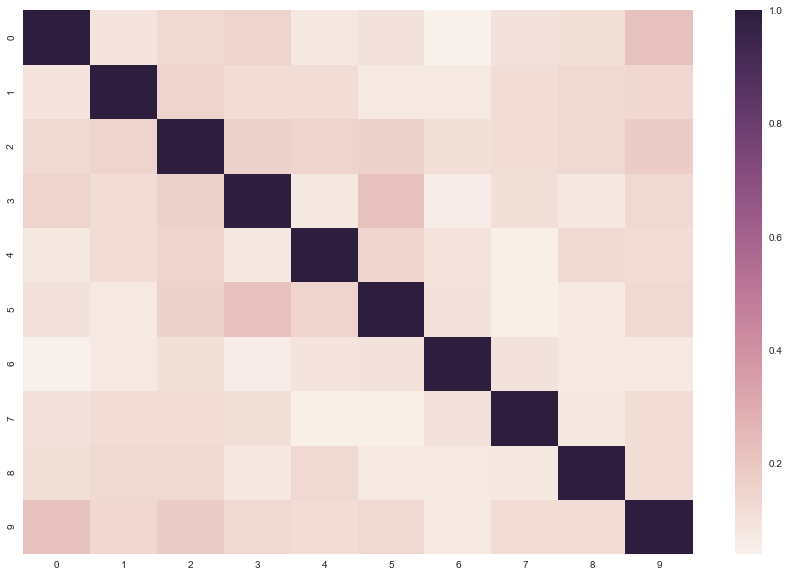

In [141]:
plt.figure(figsize=[15,10])
sns.heatmap(similarity_mat)

In [161]:
tokenized_lyrics = []
for t in range(10):
    tokenized_lyrics.append(tokenize(lyrics[t]))

In [221]:
porter = nltk.PorterStemmer()
final_lyrics = []
swremoved_lyrics = []
for song in tokenized_lyrics:
    swremoved_lyrics.append([word for word in song if word not in stopwords.words('english')])
    stemmed_lyrics = [porter.stem(word) for word in swremoved_lyrics]
    final_lyrics.append(stemmed_lyrics)

AttributeError: 'list' object has no attribute 'lower'

In [220]:
swremoved_lyrics[0]

["workin'",
 'seven',
 'eleven',
 'every',
 'night',
 '',
 'really',
 'makes',
 'life',
 'drag',
 '',
 "don't",
 'think',
 "that's",
 'right',
 "i've",
 'really',
 'best',
 'fools',
 '',
 'could,',
 'yeah',
 '',
 "'cause",
 'love',
 'you,',
 'baby',
 '',
 'love',
 'you,',
 'darling',
 '',
 'love',
 'you,',
 'baby',
 '',
 'beloved',
 'little',
 'girl,',
 'little',
 'girl',
 'baby,',
 'since',
 "i've",
 'loving',
 'you,',
 'yeah',
 '',
 "i'm",
 'lose',
 'worried',
 'mind,',
 'oh',
 'yeah',
 'everybody',
 'trying',
 'tell',
 '',
 "didn't",
 'mean',
 'good',
 "i've",
 'trying,',
 'lord,',
 'let',
 'tell',
 'let',
 'tell',
 'really',
 'best',
 'could',
 '',
 "i've",
 'working',
 'seven',
 'eleven',
 'every',
 'night',
 'said',
 'kinda',
 'makes',
 'life',
 'drag',
 '',
 'lord,',
 "ain't",
 'right,',
 '',
 'since',
 "i've",
 'loving',
 '',
 "i'm",
 'lose',
 'worried',
 'mind',
 'watch',
 'said',
 "i've",
 'crying,',
 'yeah',
 'oh,',
 'tears',
 'fell',
 'like',
 'rain',
 "don't",
 'hear,',
 "

In [194]:
sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=tokenize)

for song in final_lyrics:
    sklearn_representation = sklearn_tfidf.fit_transform(song)

In [189]:
similarity_mat = [[0 for x in range(10)] for x in range(10)]
for i in range(10):
    for j in range(10):
        similarity_mat[i][j] = (cosine_similarity(sklearn_representation.toarray()[i], sklearn_representation.toarray()[j]))
similarity_mat = np.around(similarity_mat, decimals=2)        

for row in similarity_mat:
    for elem in row:
        print(elem, end=' ')
    print()

1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 
1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 


In [139]:
from nltk.corpus import treebank, stopwords
from nltk import ConditionalFreqDist 

cfd = ConditionalFreqDist()

stopwords_list = stopwords.words('english')

def is_noun(tag):
    return tag.lower() in ['nn','nns','nn$','nn-tl','nn+bez', 'nn+hvz', 
                           'nns$','np','np$','np+bez','nps', 'nps$','nr',
                           'np-tl','nrs','nr$']

for sentence in treebank.tagged_sents():
    for (index, tagtuple) in enumerate(sentence):
        (token, tag) = tagtuple
        token = token.lower()
        if token not in stopwords_list and is_noun(tag):
            window = sentence[index+1:index+5]
            for (window_token, window_tag) in window:
                window_token = window_token.lower()
                if window_token not in stopwords_list and is_noun(window_tag):
                    cfd[token][window_token] += 1

In [140]:

print(cfd['chairman'].max(), '\n', cfd['profit'].max(), '\n', cfd['president'].max(), '\n', cfd['investor'].max(), '\n',
      cfd['city'].max(), '\n', cfd['chief'].max())

chief 
 % 
 chief 
 interest 
 streets 
 officer
